# Chocolate bar ratings 2022
The chocolate rating dataset was downloaded from kaggle https://www.kaggle.com/datasets/nyagami/chocolate-bar-ratings-2022. The original data was scraped from flavours of cacao http://flavorsofcacao.com/chocolate_database.html. The dataset comprises various chocolate bars with their ingredients. These determine the overall taste and flavour of the chocolates, which consequently affect their ratings.

The chocolate reviews are between 2006 and 2022. The dataset was last updated on June 26, 2022.


## Rating Scale
The ratings are between 1 and 5 with 1 considered the lowest rating and 5 as the highest rating possible.

4.0 - 5.0 = Outstanding
3.5 - 3.9 = Highly Recommended
3.0 - 3.49 = Recommended
2.0 - 2.9 = Disappointing
1.0 - 1.9 = Unpleasant

## Review Guide
Ratings assigned to the chocolate bars are based on the following aspects:

Flavor is the most important component of the Flavors of Cacao ratings. Diversity, balance, intensity and purity of flavors are all considered.
Texture has a great impact on the overall experience and it is also possible for texture-related issues to impact flavour.
Aftermelt is the experience after the chocolate has melted. Higher quality chocolate will linger and be long-lasting and enjoyable.
Overall Opinion is really where the ratings reflect a subjective opinion.
Other Notes- These are topics that may be interesting to discuss but may not necessarily impact the flavour or experience. For example, appearance, snap, packaging, cost etc.

## Variables
There are ten variables in the dataset as follows:

REF (reference number). The highest REF numbers were the last entries made. They are not unique values
Company name or manufacturer
Company location (Country)
Date of review of the chocolate ratings
Origin of bean (Country)
Specific bean origin or bar name
Cocoa percent
Ingredients: Represents the number of ingredients in the chocolate; B = Beans, S = Sugar, S* = Sweetener other than white cane or beet sugar, C = Cocoa Butter, V = Vanilla, L = Lecithin, Sa = Salt)
Most memorable characteristics
Rating

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyecharts.charts import Map
from pyecharts import options as opts

from wordcloud import WordCloud
from PIL import Image

import seaborn as sns

In [3]:
df = pd.read_csv('Chocolate bar ratings 2022.csv',encoding = 'utf-8')

In [4]:
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50


## 1. Information about Review Date

In [5]:
# To count the number of reviews according to years
review_date = df['Review Date'].value_counts().sort_index()
review_date

2006     62
2007     73
2008     92
2009    123
2010    110
2011    163
2012    194
2013    183
2014    247
2015    284
2016    217
2017    105
2018    228
2019    193
2020     81
2021    175
2022     58
Name: Review Date, dtype: int64

<AxesSubplot:>

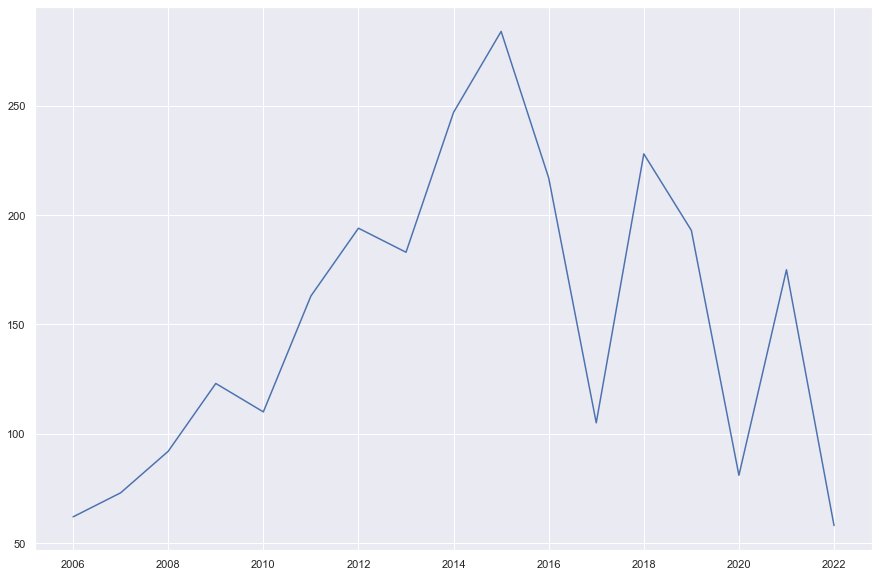

In [6]:
# Plot the trend of review date
sns.set(rc={'figure.figsize':(15,10)})
review_date.plot()

From this data, it can be inferred that chocolate bars were reviewed for each of the years from 2006 to 2022. It appears that the number of reviews has generally first increased and then decreased over time. The highest number of reviews was in 2014 with 247 reviews, and the lowest number of reviews was in 2017 with 105 reviews. It seems that the trend of reviews is increasing until 2016, then it drops significantly in 2017, but it increases again until 2020, then it drops again in 2021 and 2022. This could indicate that the chocolate industry is fluctuating and the number of reviews is not a stable indicator of the market demand or the popularity of the product.

## 2. Country of Bean Origin

In [7]:
# Normalize the Country Names so they could be fit into map
df = df.replace(['Sao Tome & Principe','Sao Tome','Principe'],'São Tomé and Príncipe')
df = df.replace({'Dominican Republic':'Dominican Rep.','U.S.A.':'United States','Ivory Coast':'Côte d\'Ivoire','U.K.':'United Kingdom','U.A.E.':'United Arab Emirates','St.Vincent-Grenadines':'St. Vin. and Gren.','St. Lucia':'Saint Lucia','South Korea':'Korea'})

In [8]:
# To check the country names
df['Country of Bean Origin'].unique()

array(['Tanzania', 'Madagascar', 'Dominican Rep.', 'Fiji', 'India',
       'Venezuela', 'Uganda', 'Bolivia', 'Peru', 'Panama', 'Brazil',
       'Ecuador', 'Colombia', 'Burma', 'Papua New Guinea', 'Cuba', 'Togo',
       'São Tomé and Príncipe', 'Mexico', 'Indonesia', 'Vanuatu',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Ghana', 'Belize', 'Blend',
       'Jamaica', 'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Haiti', 'Congo', 'Philippines', 'Solomon Islands', 'Malaysia',
       'Sri Lanka', "Côte d'Ivoire", 'Gabon', 'Taiwan', 'Puerto Rico',
       'Martinique', 'Saint Lucia', 'Australia', 'Liberia',
       'Sierra Leone', 'Bali', 'United States', 'Nigeria',
       'St. Vin. and Gren.', 'Thailand', 'Tobago', 'Sumatra',
       'El Salvador', 'Cameroon', 'Samoa', 'China', 'Sulawesi',
       'Suriname', 'DR Congo'], dtype=object)

In [9]:
# To prepare the data of country name and counts of bean origin for the map
origin = df['Country of Bean Origin'].value_counts()
df_origin = origin.to_frame()
df_origin= df_origin.reset_index(drop=False)
df_origin=df_origin.rename(columns={'index':'Country Name'})
df_origin[0:30]

,Country Name,Country of Bean Origin
0,Venezuela,254
1,Peru,248
2,Dominican Rep.,234
3,Ecuador,223
4,Madagascar,184
5,Blend,156
6,Nicaragua,103
7,Brazil,81
8,Colombia,81
9,Tanzania,81


In [10]:
# Draw the Choropleth Map for Country of Bean Origin
origin_map = (
    Map(init_opts=opts.InitOpts(width="600px",height='350px'))
    .add("Origin", [list(z) for z in zip(df_origin['Country Name'],df_origin['Country of Bean Origin'])], "world",is_map_symbol_show=False) 
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Country of Bean Origin"),  
        visualmap_opts=opts.VisualMapOpts(max_=260), 
    )   
)
origin_map.render_notebook()

From the data and map, it can be inferred that chocolate beans are planted in a wide range of the world, including South America, North America, Africa, Asian and Austrailia. The majority of chocolate beans are sourced from South America such as Venezuela, Peru, and Ecuador. It is also worth noting that there is also a "Blend" option that accounts for 156 beans, which could mean that the chocolate industry is using a combination of beans from different countries to create a unique flavor. This data suggests that a few countries are the major producers of chocolate beans and they are the main suppliers to the market.

## 3. Company Location Distribution

In [11]:
# To find the top 10 companies which produce most chocolate bars, 
# and classify the remaining companies into the "others" category, 
# and then draw a pie chart

company_loc = df['Company Location'].value_counts()
df_company_loc  = company_loc.to_frame()
df_company_loc[0:30]

,Company Location
United States,1168
France,179
Canada,178
United Kingdom,134
Italy,79
Belgium,72
Ecuador,58
Australia,53
Switzerland,44
Germany,43


In [12]:
# To calculate the number of "other" companies
sum_company = df_company_loc['Company Location'].sum()
sum_top10=0
for i in range(10):
    sum_top10+=df_company_loc['Company Location'][i]
    
others = sum_company-sum_top10
others

580

In [13]:
# Insert the 'other' category into the dataframe
df_loc_top10  = df_company_loc.iloc[0:10]
df_loc_top10=df_loc_top10.reset_index(drop=False)
df_loc_top10=df_loc_top10.rename(columns={'index':'Country Name'})
df_loc_top10.loc[10] = ['Other', others]
df_loc_top10

,Country Name,Company Location
0,United States,1168
1,France,179
2,Canada,178
3,United Kingdom,134
4,Italy,79
5,Belgium,72
6,Ecuador,58
7,Australia,53
8,Switzerland,44
9,Germany,43


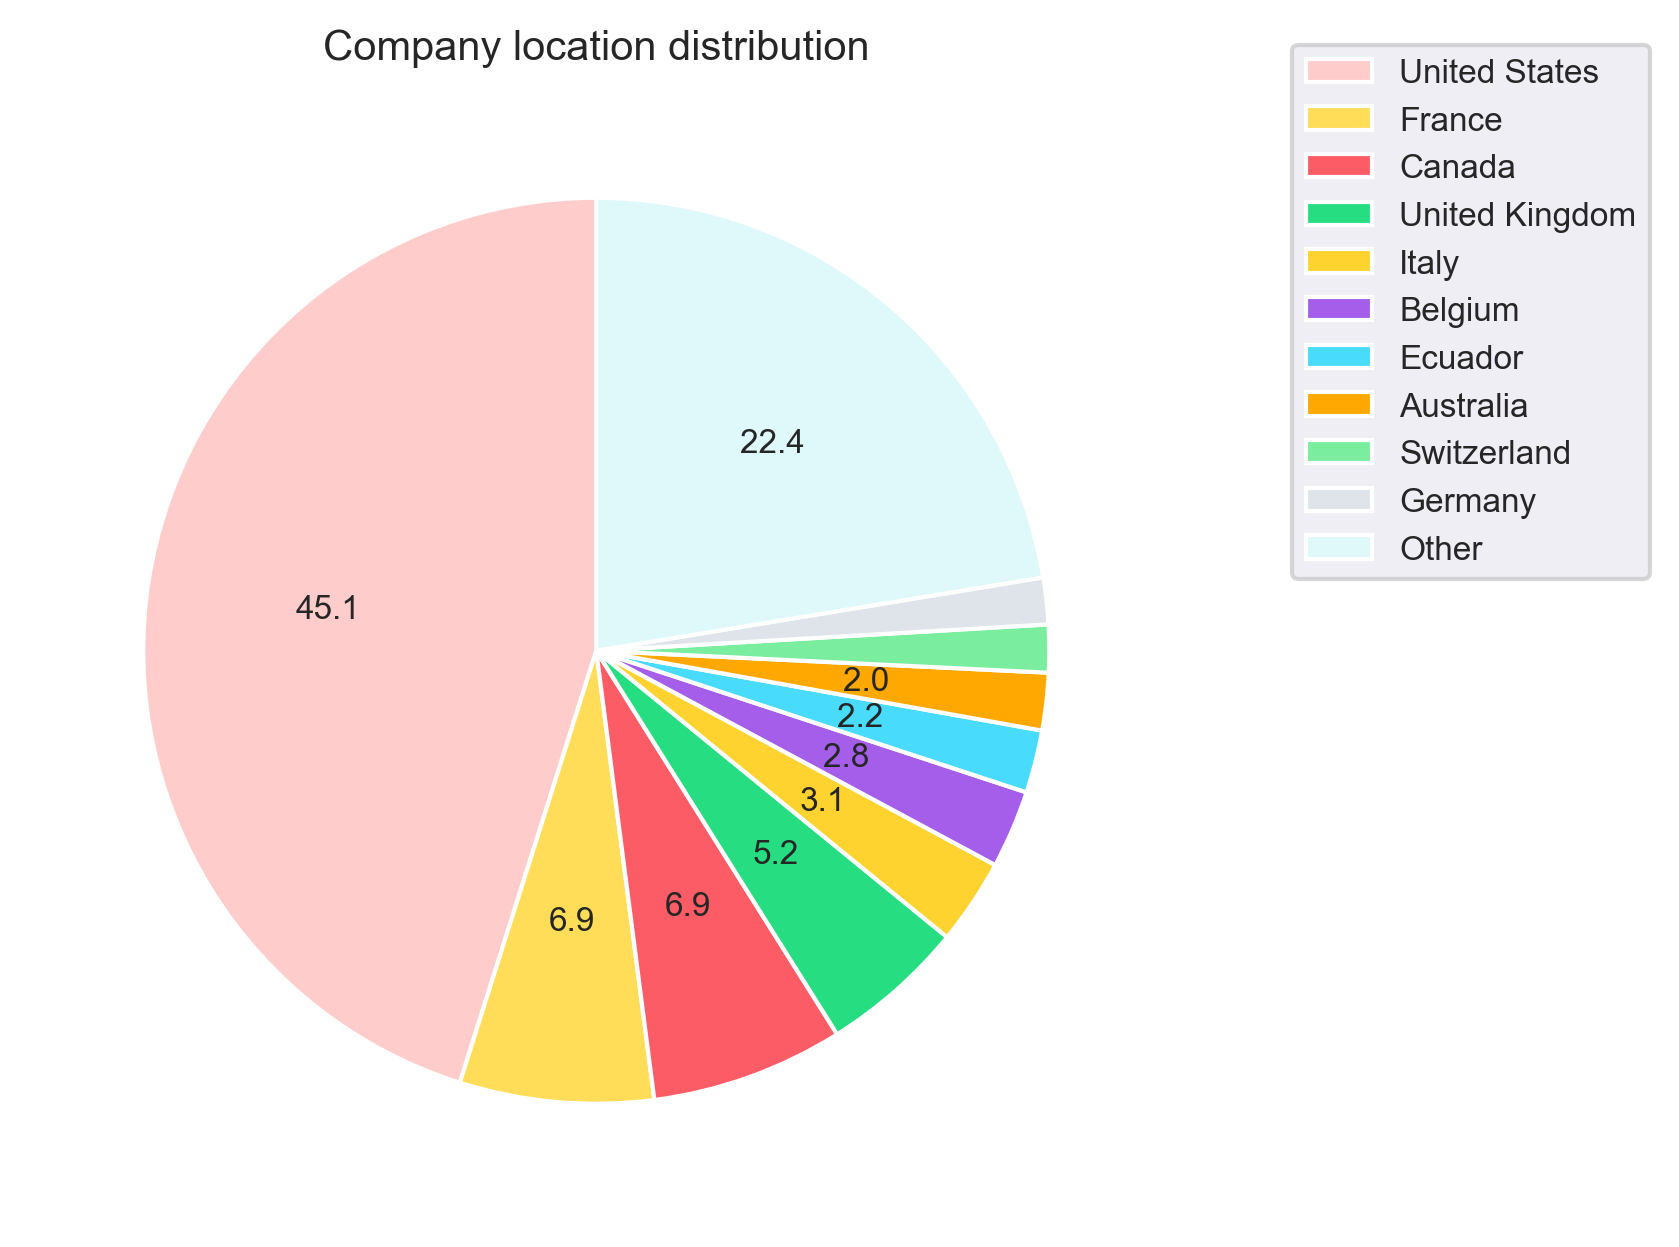

In [14]:
# Plot the pie chart of company location distribution
category_names=df_loc_top10['Country Name']
sizes=df_loc_top10['Company Location']
plt.figure(figsize=(5,5),dpi=300)
custom_colors=['#ffcccc','#ffdd59','#fc5c65','#26de81','#fed330','#a55eea','#48dbfb','#ffa801','#7bed9f','#dfe4ea','#dff9fb']
    
plt.pie(sizes,textprops={'fontsize':8},startangle=90,colors=custom_colors,autopct = lambda p: format(p, '.1f') if p > 2 else None)
plt.legend(bbox_to_anchor=(1.1,1.05),fontsize=8,labels=category_names)
plt.title("Company location distribution",fontsize=10) 
plt.show()

In [15]:
# Draw the Choropleth Map for Company Location
company_map = (
    Map(init_opts=opts.InitOpts(width='600px',height='350px'))
    .add("Company Location", [list(z) for z in zip(df_company_loc.index, df_company_loc['Company Location'])], "world",is_map_symbol_show=False) 
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))  
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Company location"),  
        visualmap_opts=opts.VisualMapOpts(max_=1200),           
    )   
)
company_map.render_notebook()

From the pie chart and the map, we can see that the majority of chocolate bar companies are located in the United States, with 1168 companies, taking up almost half of the total companies. Other countries with a significant number of companies include France, Canada, and the United Kingdom. The rest of the countries on the list have fewer companies, with Italy, Belgium, Ecuador and Australia having a notable number of companies. It appears that the United States and some European countries are the major producers of chocolate bars. This suggests that the chocolate industry is heavily concentrated in some specific developed countries.

## 4. Rating Distribution

In [16]:
# To count the number of ratings according to the scores
rating = df['Rating'].value_counts().sort_index()
rating

1.00      4
1.50     10
1.75      3
2.00     33
2.25     17
2.50    169
2.75    339
3.00    534
3.25    474
3.50    584
3.75    306
4.00    115
Name: Rating, dtype: int64

In [17]:
# To calculate the average rating of the chocolate bars.
df['Rating'].mean()

3.198319165378671

<BarContainer object of 12 artists>

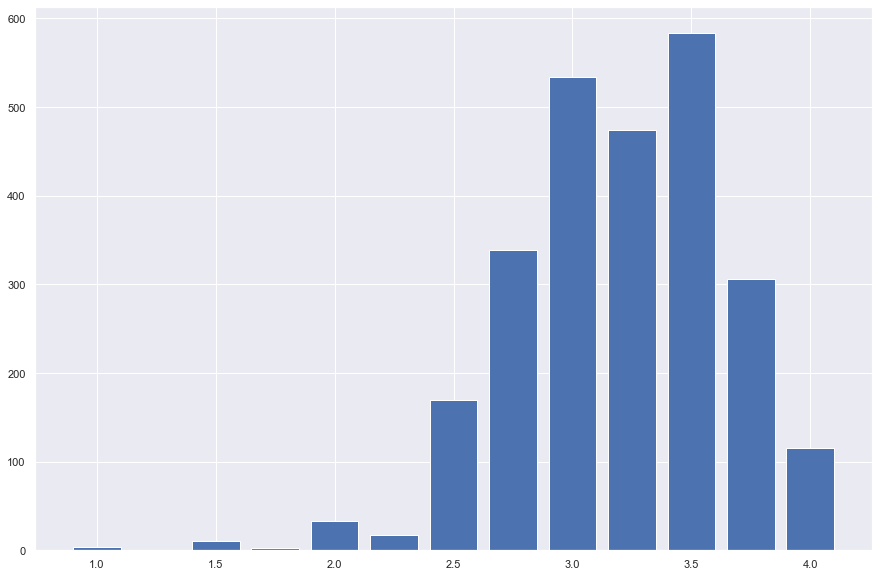

In [18]:
# To plot the rating distribution
plt.bar(rating.index,rating.values,width=0.2)

The average rating for different brands of chocolate is around 3.2, which indicates that the majority of the brands of chocolate are generally considered to be satisfactory by the majority of raters. Additionally, it can also be seen that most of the ratings are distributed within the range of 2.75 to 3.75, which implies that there is a relatively small spread in the ratings among different brands of chocolate and that the majority of raters have similar opinions about these brands of chocolate bars. Furthermore, the fact that ratings under 2.25 occupy a very small portion of the ratings and there are no ratings higher than 4.0 suggests that the majority of chocolate bars are perceived as being of similar quality, and that there is a lack of exceptional products. This could mean that the chocolate industry is a competitive industry and most of the time the difference between chocolate bars are minor.

## 5. Manufacturer for the Recommanded Chocolate

In [19]:
# To find out the average rating of chocolate bars from each company
df_grouped=df.groupby(df['Company (Manufacturer)'])['Rating'].mean()
manufacturer_recommended=df_grouped.sort_values(ascending=False)
manufacturer_recommended


Company (Manufacturer)
Tobago Estate (Pralus)                  4.000000
Ocelot                                  3.875000
Heirloom Cacao Preservation (Zokoko)    3.875000
Matale                                  3.812500
Patric                                  3.791667
                                          ...   
Love Bar                                2.000000
Majani                                  2.000000
Callebaut                               1.875000
Machu Picchu Trading Co.                1.875000
Cote d' Or (Kraft)                      1.000000
Name: Rating, Length: 593, dtype: float64

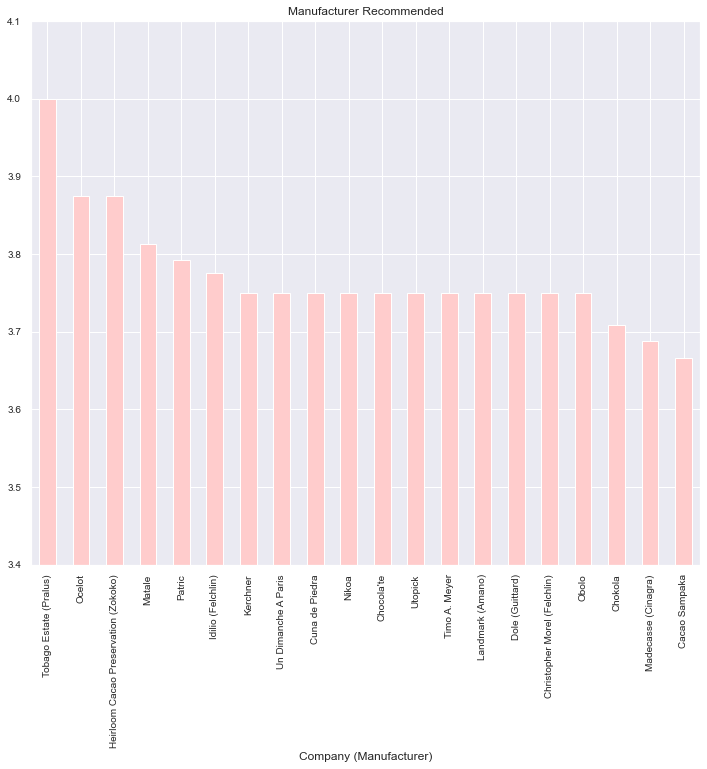

In [20]:
# To plot the top 20 companies with the highest average rating of chocolate
ax_manufacturer_recommended = manufacturer_recommended[0:20].plot(
    kind='bar',
    figsize=(12, 10),
    title="Manufacturer Recommended",
    ylim=(3.4, 4.1),
    legend=False,
    color='#ffcccc',
    fontsize=10)
plt.show()

In [21]:
df_manufacturer = manufacturer_recommended.to_frame()

In [22]:
df_manufacturer_recommand = df_manufacturer[df_manufacturer['Rating']>=3.0]
df_manufacturer_recommand

,Rating
Company (Manufacturer),
Tobago Estate (Pralus),4.000000
Ocelot,3.875000
Heirloom Cacao Preservation (Zokoko),3.875000
Matale,3.812500
Patric,3.791667
...,...
Baiani,3.000000
Millcreek Cacao Roasters,3.000000
Sacred,3.000000


In [23]:
# to see the location of company whose chocolates are recommended
manufacturer_list = df_manufacturer_recommand.index.to_list()
df_filtered = df[df['Company (Manufacturer)'].isin(manufacturer_list)].drop_duplicates(subset='Company (Manufacturer)')

In [24]:
location_counts = df_filtered['Company Location'].value_counts()
location_counts=location_counts.to_frame()
location_counts

,Company Location
United States,178
Canada,22
France,17
United Kingdom,16
Japan,10
Italy,10
Brazil,10
Switzerland,10
Australia,10
Ecuador,9


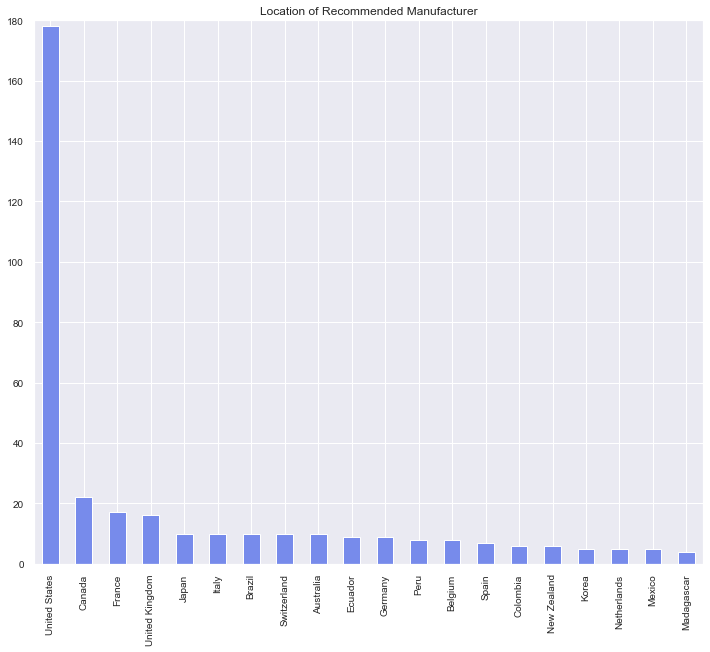

In [25]:
# Draw a bar chart of the location of recommended company
ax_location_recommended = location_counts[0:20].plot(
    kind='bar',
    figsize=(12, 10),
    title="Location of Recommended Manufacturer",
    ylim=(0, 180),
    legend=False,
    color='#778beb',
    fontsize=10)

# plt.tight_layout()
plt.show()

It can be inferred that a majority of the recommended chocolate bars come from the United States, with 178 out of 365 total. Canada, France, and the United Kingdom also have a notable presence in the list with 22, 17, and 16 recommended chocolate bars respectively. Additionally, it can be inferred that the data has a relatively even distribution among other countries, with several of them having between 3 to 10 recommended chocolate bars. Some countries like Bolivia, Czech Republic, Suriname, Fiji, Iceland, Chile, Ireland, Lithuania, Poland, United Arab Emirates, Honduras, Saint Lucia, Thailand, Israel, Guatemala, Norway, and El Salvador have only one chocolate bar recommended. This suggests that the recommendations for chocolate bars are come from a diverse range of countries and regions, but are dominated by the United States.

## 6. Facts about Cocoa Percentage 

In [26]:
# To transform the str type into float type in column 'Cocoa Percent'
cocoa_percent=df['Cocoa Percent'].str.strip('%').astype(float) / 100
df['Cocoa Percent New'] = cocoa_percent
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,Cocoa Percent New
0,2454,5150,United States,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25,0.76
1,2454,5150,United States,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75,0.76
2,2458,5150,United States,2019,Dominican Rep.,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50,0.76
3,2542,5150,United States,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00,0.68
4,2542,5150,United States,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50,0.68
...,...,...,...,...,...,...,...,...,...,...,...
2583,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,0.80
2584,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75,0.75
2585,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00,0.75
2586,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,0.70


In [27]:
# To see the average number of cocoa percentage for all chocolate
df['Cocoa Percent New'].mean()

0.7161302163833236

In [28]:
# To see the average number of cocoa percentage for highly recommended chocolate
df_highly_recommend = df.loc[df['Rating']>=4.0]
df_highly_recommend['Cocoa Percent New'].mean()

0.707565217391305

In [29]:
# To see the average number of cocoa percentage for unpleasant chocolate
df_unpleasant = df.loc[df['Rating']<2.0]
df_unpleasant['Cocoa Percent New'].mean()

0.8429411764705881

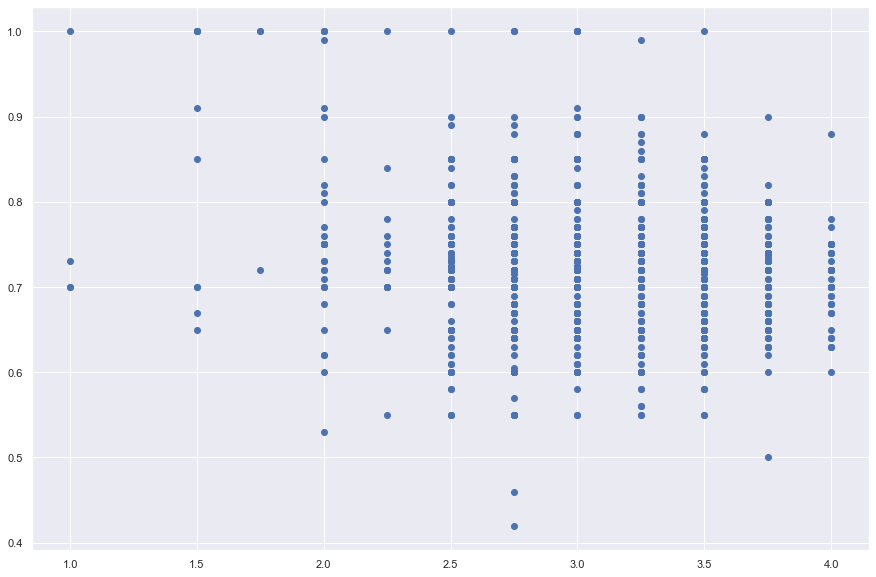

In [30]:
# Draw a scatter plot of the ratings
X = [[number] for number in df['Rating']]
y=df['Cocoa Percent New']
plt.scatter(X,y)

From the data of average cocoa percentage and the scatter plot, it can be inferred that the average cocoa percentage for all chocolate bars is 71.6%. However, chocolate bars that are rated as unpleasant have a higher average cocoa percentage of 84.3%. On the other hand, chocolate bars that are highly recommended have a lower average cocoa percentage of 70.8%. The majority of the cocoa percentage falls between 60% to 90%.

Furthermore, it can be inferred that chocolate bars with a rating below 3.75 tend to have a higher cocoa percentage, with 100% cocoa chocolate bars appearing in this group. However, chocolate bars with a rating of more than 3.75 tend to have a cocoa percentage mostly between 60%-80%, with the highest cocoa percentage being 90%. This suggests that a higher cocoa percentage does not necessarily correspond to higher ratings. It could be that the chocolate bars with a higher cocoa percentage tend to have a more intense and bitter taste, which some people may not prefer. On the other hand, chocolate bars with a cocoa percentage of 60%-80% tend to have a well-balanced, nuanced flavor profile with a focus on rich, natural flavors, which is why they are highly recommended.

Overall, the data suggests that while a higher cocoa percentage may be associated with a more intense and bitter taste, it is not the only factor that affects the taste and rating of a chocolate bar. Other factors such as the origin of cocoa beans, the manufacturing process, and the balance of flavors also play a crucial role in determining the taste and quality of a chocolate bar.

## 7. the Most Memorable Characteristics of Recommanded and Disappointing Chocolate

In [31]:
# Define the recommended chocolate bar as the ones with rating greater or equal to 3.0,
# and disappointing chocolate with rating less than 3.0
# Then join the words into a string in order to generate wordcloud
df_recommend = df.loc[df['Rating']>=3.0]
df_disappoint = df.loc[df['Rating']<3.0]

string_recommend = ' ,'.join(df_recommend['Most Memorable Characteristics'])
string_disappoint = ' ,'.join(df_disappoint['Most Memorable Characteristics'])

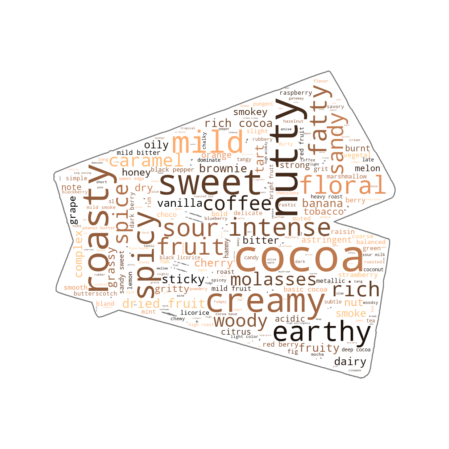

In [32]:
# Generate Word Cloud for Recommended Chocolate
chocolate_file = 'chocolate.png'
icon=Image.open(chocolate_file).convert("RGBA")  
image_mask=Image.new(mode='RGB',size=icon.size,color=(255,255,255))
image_mask.paste(icon,box  =icon)


rgb_array=np.array(image_mask)


word_cloud=WordCloud(mask=rgb_array,background_color='white',max_words=500,colormap='copper',contour_width=3,contour_color='gray')
word_cloud.generate(string_recommend)

plt.figure(figsize=[16,8])

plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

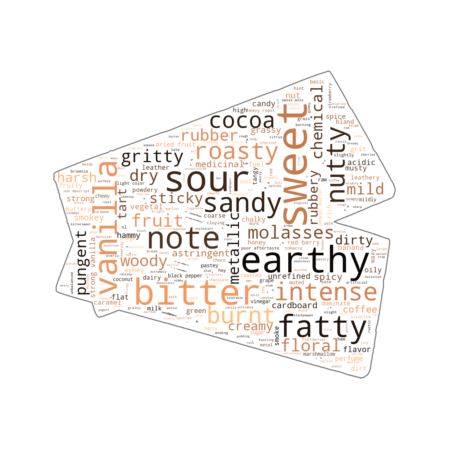

In [33]:
# Generate Word Cloud for Unpleasant Chocolate
chocolate_file = 'chocolate.png'
icon=Image.open(chocolate_file).convert("RGBA")  
image_mask=Image.new(mode='RGB',size=icon.size,color=(255,255,255))
image_mask.paste(icon,box  =icon)


rgb_array=np.array(image_mask)


word_cloud=WordCloud(mask=rgb_array,background_color='white',max_words=500,colormap='copper',contour_width=3,contour_color='gray')
word_cloud.generate(string_disappoint)

plt.figure(figsize=[16,8])

plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

From the two wordcloud, it can be inferred that the recommended chocolate bars are typically described as having roasty, nutty, cocoa, creamy, mild, sweet, spicy, and earthy flavors. These terms suggest that the recommended chocolate bars have a rich, complex flavor profile with a balance of sweetness and nuttiness, with a creamy texture and notes of cocoa and spices.  

The words used to describe the disappointing chocolate bars are bitter, earthy, sweet, intense, sandy, fatty, sour and vanilla. These terms suggest that the disappointing chocolate bars have a harsh, unbalanced flavor profile with a strong bitter taste and a sandy texture.  

The presence of 'sweet' in both recommended and disappointing chocolate bars suggests that sweetness is a common attribute in chocolate bars, but it could be that the sweet in disappointing chocolate bars is not well balanced with other flavors.  

In general, the data indicates that the recommended chocolate bars have a well-balanced, nuanced flavor profile with a focus on rich, natural flavors, while the disappointing chocolate bars have a harsh, unbalanced flavor profile with a focus on bitter and sour notes.